In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_csv('datasets/Customers.csv')
df2 = pd.read_csv('datasets/Products.csv')
df3 = pd.read_csv('datasets/Transactions.csv')

In [4]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [48]:
df2.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [5]:
df1.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

In [6]:
df1.shape

(200, 4)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [8]:
df1.nunique()

CustomerID      200
CustomerName    200
Region            4
SignupDate      179
dtype: int64

In [9]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2024-11-11
freq,1,1,59,3


In [10]:
df1['SignupDate'] = pd.to_datetime(df1['SignupDate'])

In [11]:
df1.dtypes, df1.head()

(CustomerID              object
 CustomerName            object
 Region                  object
 SignupDate      datetime64[ns]
 dtype: object,
   CustomerID        CustomerName         Region SignupDate
 0      C0001    Lawrence Carroll  South America 2022-07-10
 1      C0002      Elizabeth Lutz           Asia 2022-02-13
 2      C0003      Michael Rivera  South America 2024-03-07
 3      C0004  Kathleen Rodriguez  South America 2022-10-09
 4      C0005         Laura Weber           Asia 2022-08-15)

In [12]:
region_distribution = df1['Region'].value_counts(normalize=True) * 100
region_distribution

Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: proportion, dtype: float64

In [13]:
merged_data = df3.merge(df1, on='CustomerID', how='left')
merged_data = merged_data.merge(df2, on='ProductID', how='left')

In [14]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['MonthYear'] = merged_data['TransactionDate'].dt.to_period('M')

In [15]:
print("\nSummary statistics of merged data:")
print(merged_data.describe())


Summary statistics of merged data:
                     TransactionDate     Quantity   TotalValue     Price_x  \
count                           1000  1000.000000  1000.000000  1000.00000   
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

                          SignupDate     Price_y  
count                           1000  1000.00000  
mean   2023-07-09 02:49:55.199999744   272.55407  
min              2022-01-22 00:00:00    16.08000  
25%              2022-09-17 12:00:00   147.95000  
50%   

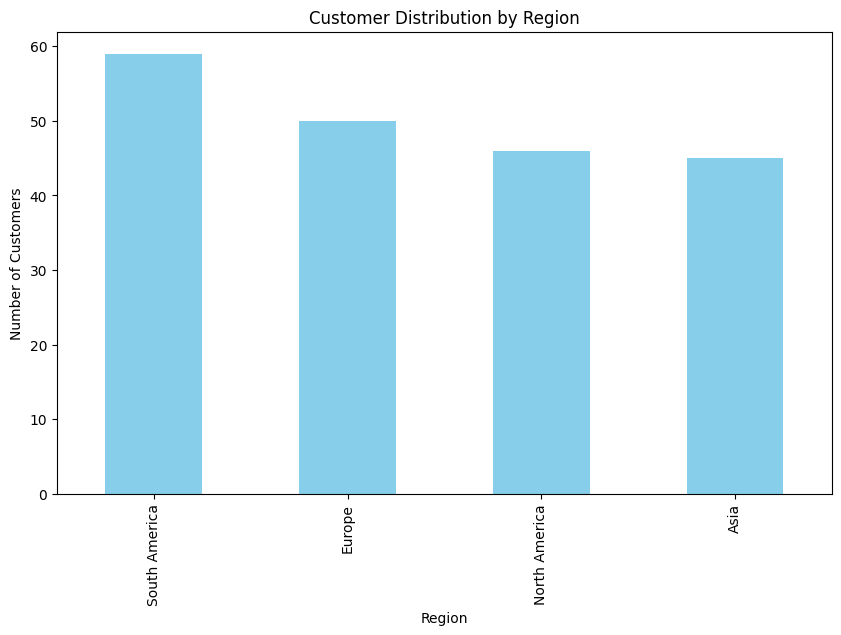

In [17]:
plt.figure(figsize=(10, 6))
region_counts = df1['Region'].value_counts()
region_counts.plot(kind='bar', color='skyblue')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

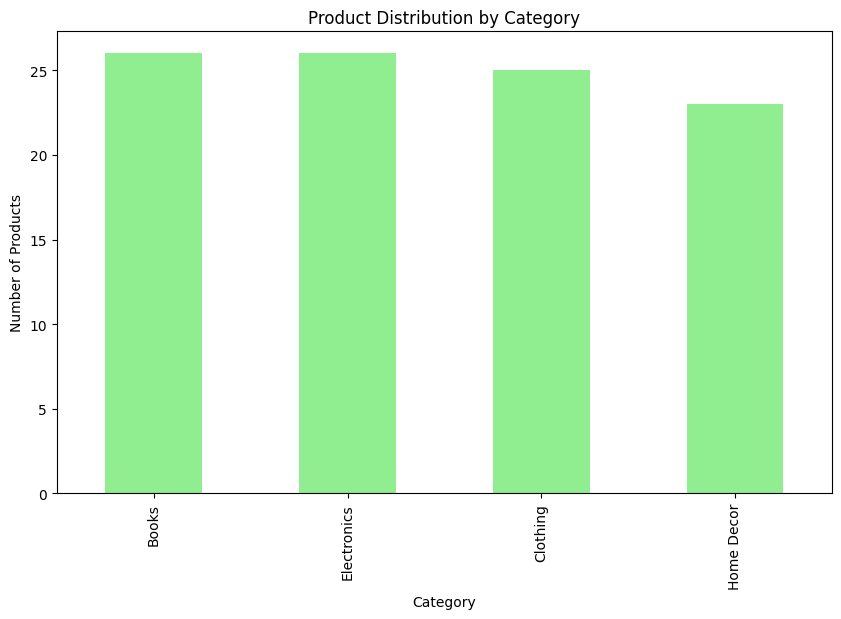

In [18]:
plt.figure(figsize=(10, 6))
category_counts = df2['Category'].value_counts()
category_counts.plot(kind='bar', color='lightgreen')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


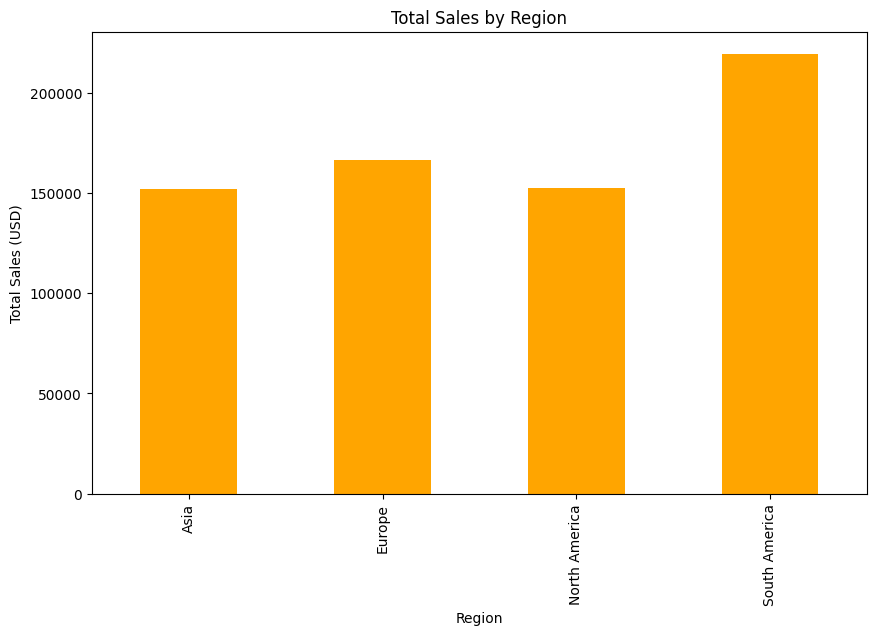

In [47]:
sales_by_region = merged_data.groupby('Region')['TotalValue'].sum()
print(sales_by_region)
sales_by_region.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.show()

In [40]:
sales_per_product_region = merged_data.groupby(['Category', 'Region']).agg(
    TotalSalesCount=('Quantity', 'sum'),
    TotalSalesValue=('TotalValue', 'sum')
).reset_index()

print("\nTotal Sales Count and Value per Product per Region:")
print(sales_per_product_region)


Total Sales Count and Value per Product per Region:
       Category         Region  TotalSalesCount  TotalSalesValue
0         Books           Asia              120         33119.03
1         Books         Europe              165         47464.42
2         Books  North America              155         41811.99
3         Books  South America              241         69752.03
4      Clothing           Asia              166         49353.09
5      Clothing         Europe              119         36335.59
6      Clothing  North America              147         38038.49
7      Clothing  South America              158         42443.49
8   Electronics           Asia              132         35658.15
9   Electronics         Europe              144         41562.60
10  Electronics  North America              153         44716.43
11  Electronics  South America              198         58846.32
12   Home Decor           Asia              142         33944.70
13   Home Decor         Europe       


Total Sales Count and Value per Product per Region:
       Category         Region  TotalSalesCount  TotalSalesValue
0         Books           Asia              120         33119.03
1         Books         Europe              165         47464.42
2         Books  North America              155         41811.99
3         Books  South America              241         69752.03
4      Clothing           Asia              166         49353.09
5      Clothing         Europe              119         36335.59
6      Clothing  North America              147         38038.49
7      Clothing  South America              158         42443.49
8   Electronics           Asia              132         35658.15
9   Electronics         Europe              144         41562.60
10  Electronics  North America              153         44716.43
11  Electronics  South America              198         58846.32
12   Home Decor           Asia              142         33944.70
13   Home Decor         Europe       

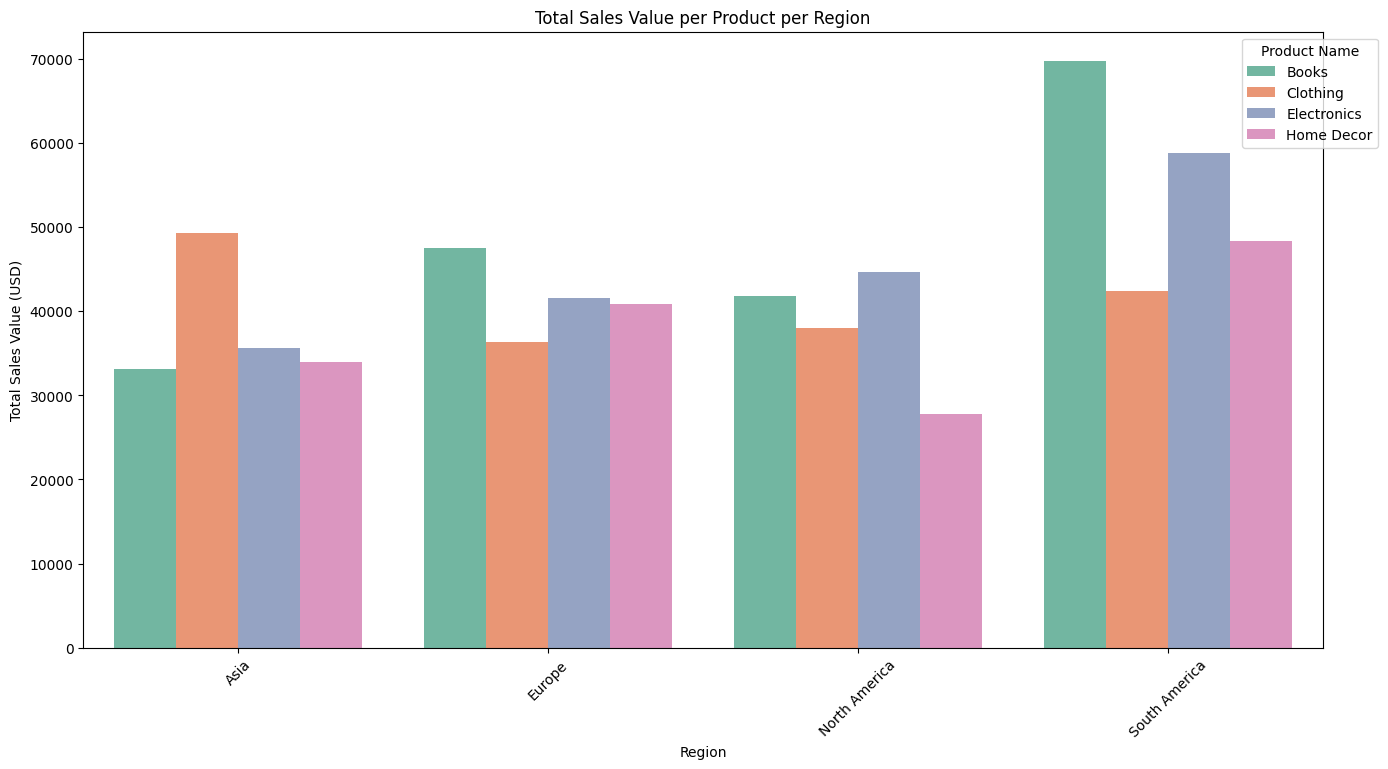

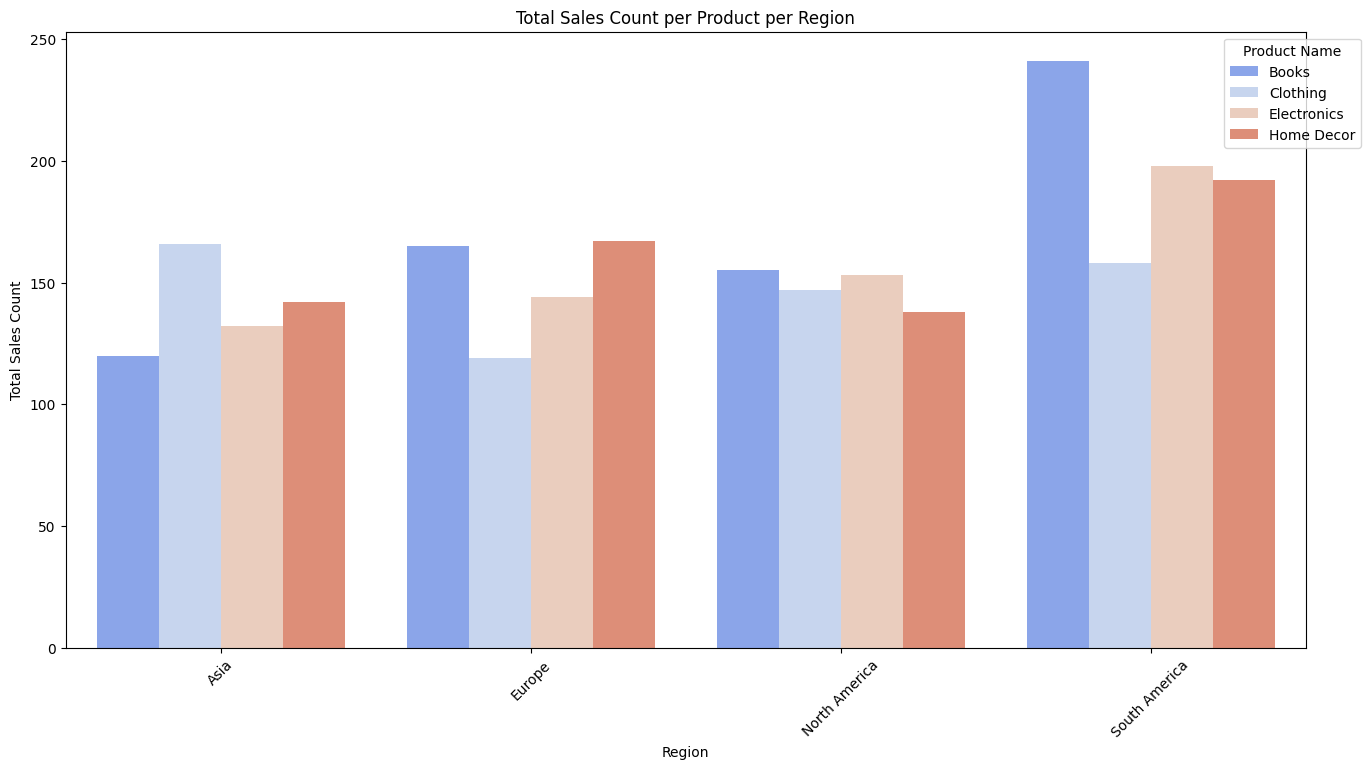

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_per_product_region = merged_data.groupby(['Category', 'Region']).agg(
    TotalSalesCount=('Quantity', 'sum'),
    TotalSalesValue=('TotalValue', 'sum')
).reset_index()

print("\nTotal Sales Count and Value per Product per Region:")
print(sales_per_product_region)

plt.figure(figsize=(16, 8))
sns.barplot(
    data=sales_per_product_region,
    x='Region',
    y='TotalSalesValue',
    hue='Category',
    palette='Set2'
)
plt.title('Total Sales Value per Product per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Value (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), title='Product Name')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(16, 8))
sns.barplot(
    data=sales_per_product_region,
    x='Region',
    y='TotalSalesCount',
    hue='Category',
    palette='coolwarm'
)
plt.title('Total Sales Count per Product per Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Count')
plt.legend(bbox_to_anchor=(1.05, 1), title='Product Name')
plt.xticks(rotation=45)
plt.show()


In [ ]:
''' 
South America has consistently more products sold and revenue than other regions
'''

'''
Clothing is surpisingly lower in South America compared to other categories
whereas in Asia Clothing has the highest sales
''' 

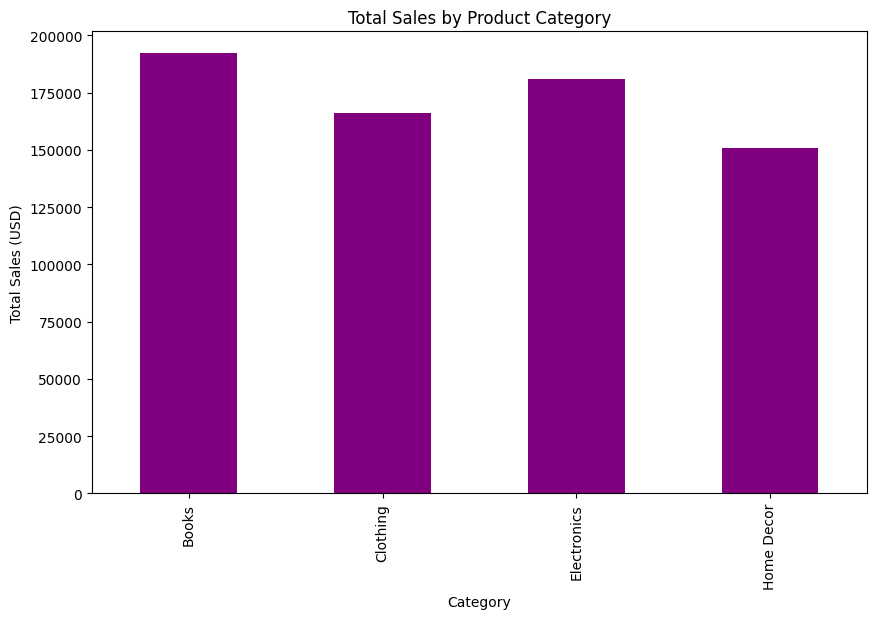

In [20]:
sales_by_category = merged_data.groupby('Category')['TotalValue'].sum()
sales_by_category.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales (USD)')
plt.show()

In [ ]:
'''
total sales of books is the highest total sales and the highes purchase count per transaction 
'''

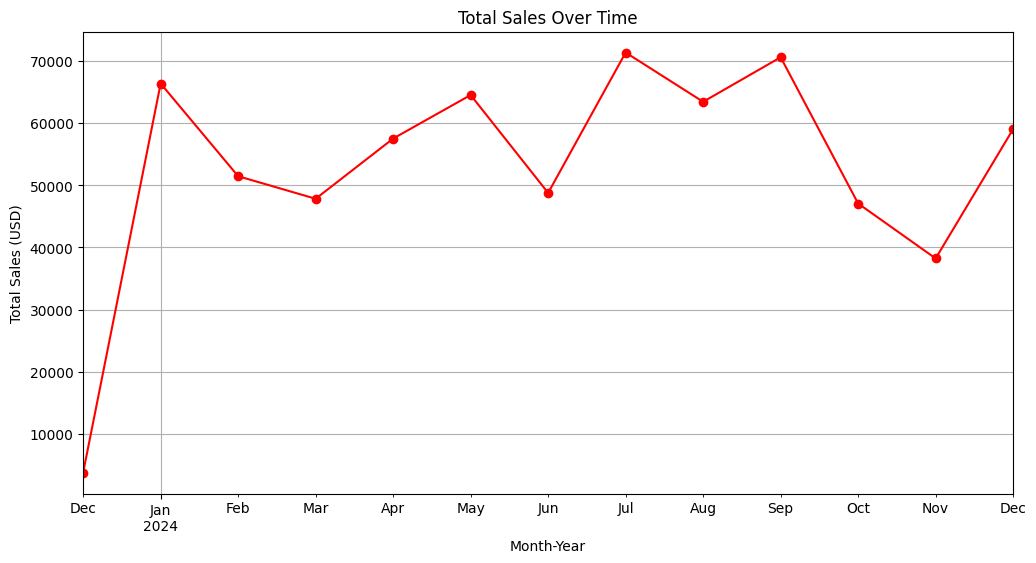

In [21]:
sales_over_time = merged_data.groupby('MonthYear')['TotalValue'].sum()
sales_over_time.plot(kind='line', marker='o', color='red', figsize=(12, 6))
plt.title('Total Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (USD)')
plt.grid()
plt.show()


Quarterly Sales Data:
QuarterYear
2023Q4      3769.52
2024Q1    165664.39
2024Q2    170817.98
2024Q3    205406.88
2024Q4    144336.79
Freq: Q-DEC, Name: TotalValue, dtype: float64


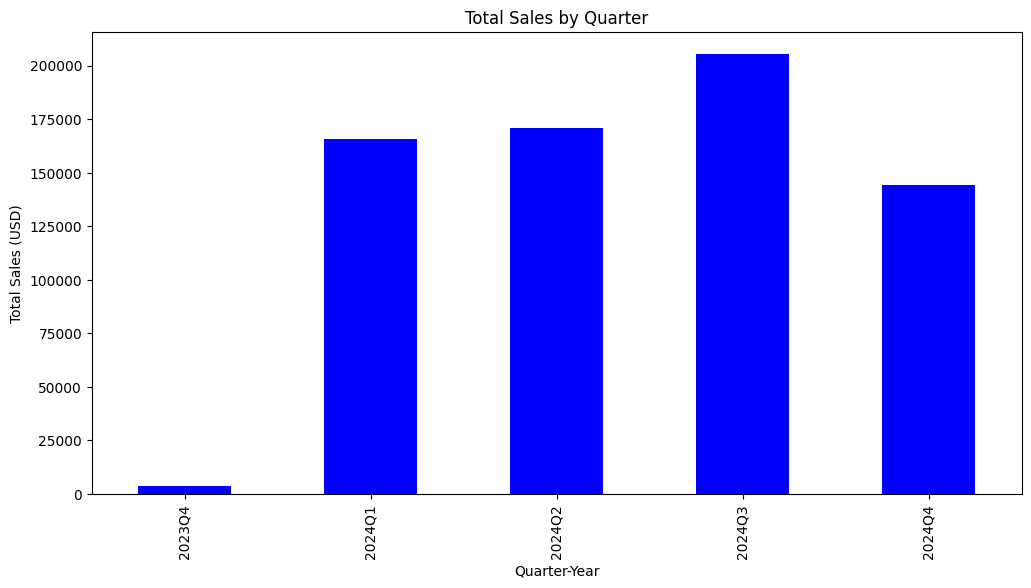


Quarterly Average Sales: 137999.11 USD


In [31]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['QuarterYear'] = merged_data['TransactionDate'].dt.to_period('Q')

sales_quarterly = merged_data.groupby('QuarterYear')['TotalValue'].sum()
print("\nQuarterly Sales Data:")
print(sales_quarterly)

sales_quarterly.plot(kind='bar', color='blue', figsize=(12, 6))
plt.title('Total Sales by Quarter')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Sales (USD)')
plt.show()

quarterly_average_sales = sales_quarterly.mean()
print(f"\nQuarterly Average Sales: {quarterly_average_sales:.2f} USD")


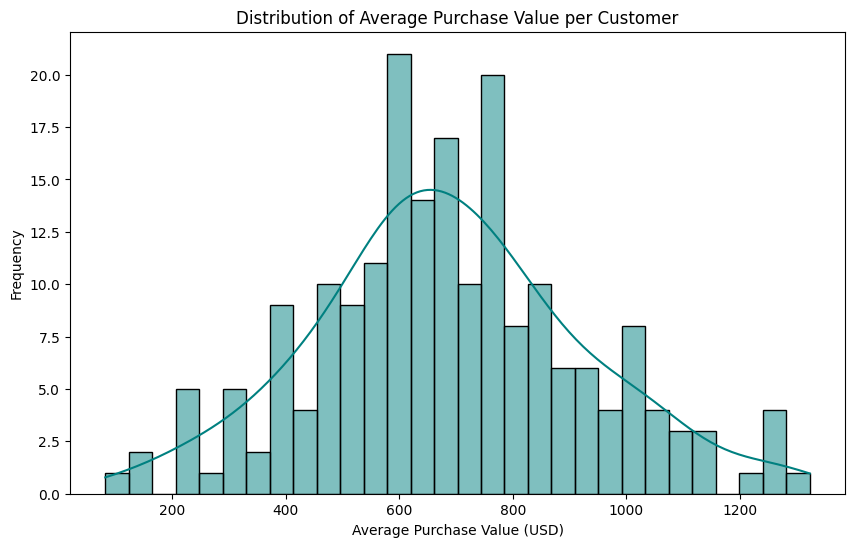

Overall Average Purchase Value: $687.58


In [46]:
average_purchase_by_customer = merged_data.groupby('CustomerID')['TotalValue'].mean()
plt.figure(figsize=(10, 6))
sns.histplot(average_purchase_by_customer, bins=30, kde=True, color='teal')
plt.title('Distribution of Average Purchase Value per Customer')
plt.xlabel('Average Purchase Value (USD)')
plt.ylabel('Frequency')
plt.show()

overall_avg_purchase_value = average_purchase_by_customer.mean()
print(f"Overall Average Purchase Value: ${overall_avg_purchase_value:.2f}")

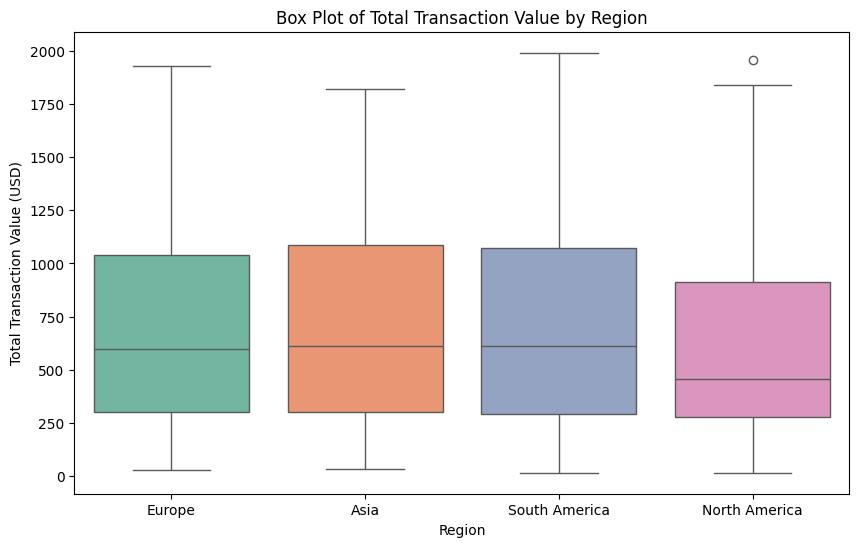

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='TotalValue', data=merged_data, palette='Set2', hue='Region')
plt.title('Box Plot of Total Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Transaction Value (USD)')
plt.show()

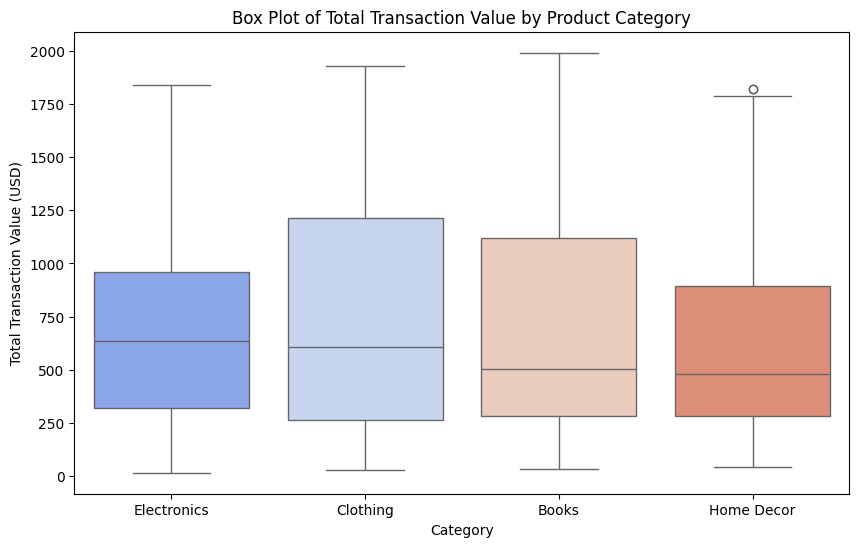

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='TotalValue', data=merged_data, palette='coolwarm', hue='Category', legend=False)
plt.title('Box Plot of Total Transaction Value by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Transaction Value (USD)')
plt.show()


Average Transaction Value by Product Category:
Category
Books          711.657296
Clothing       728.818684
Electronics    711.746063
Home Decor     608.443266
Name: TotalValue, dtype: float64


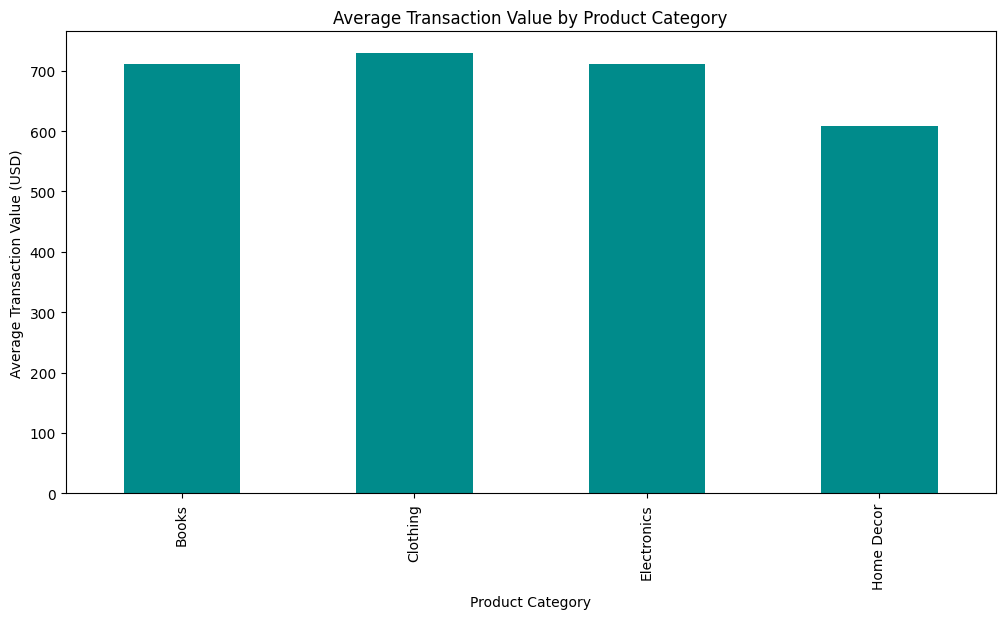

In [36]:
avg_transaction_value_by_category = merged_data.groupby('Category')['TotalValue'].mean()
print("\nAverage Transaction Value by Product Category:")
print(avg_transaction_value_by_category)

avg_transaction_value_by_category.plot(kind='bar', color='darkcyan', figsize=(12, 6))
plt.title('Average Transaction Value by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Transaction Value (USD)')
plt.show()

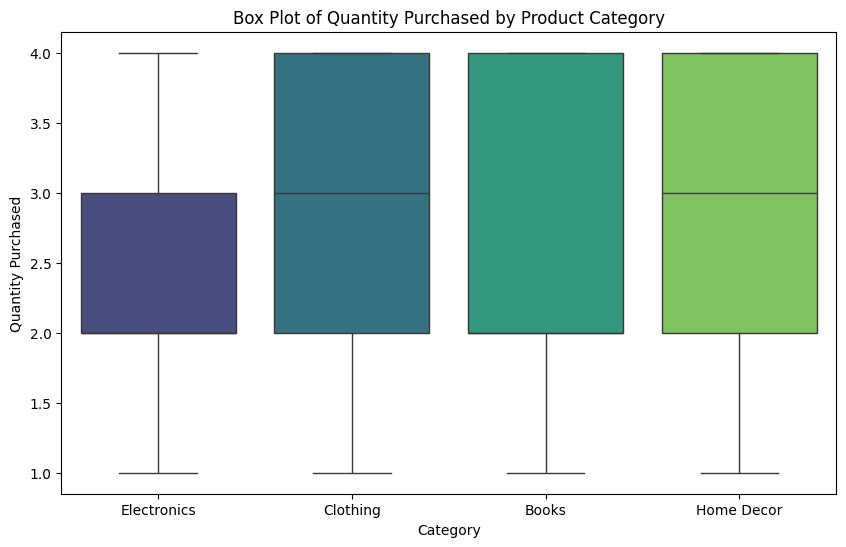

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Quantity', data=merged_data, palette='viridis', hue='Category', legend=False)
plt.title('Box Plot of Quantity Purchased by Product Category')
plt.xlabel('Category')
plt.ylabel('Quantity Purchased')
plt.show()

In [ ]:
''' 
although purachase count of home decor is relatviely close to the other categories, total and average sales are significatnyl lower 
'''


Average Purchase Count by Product Category:
Category
Books          270
Clothing       228
Electronics    254
Home Decor     248
Name: TotalValue, dtype: int64


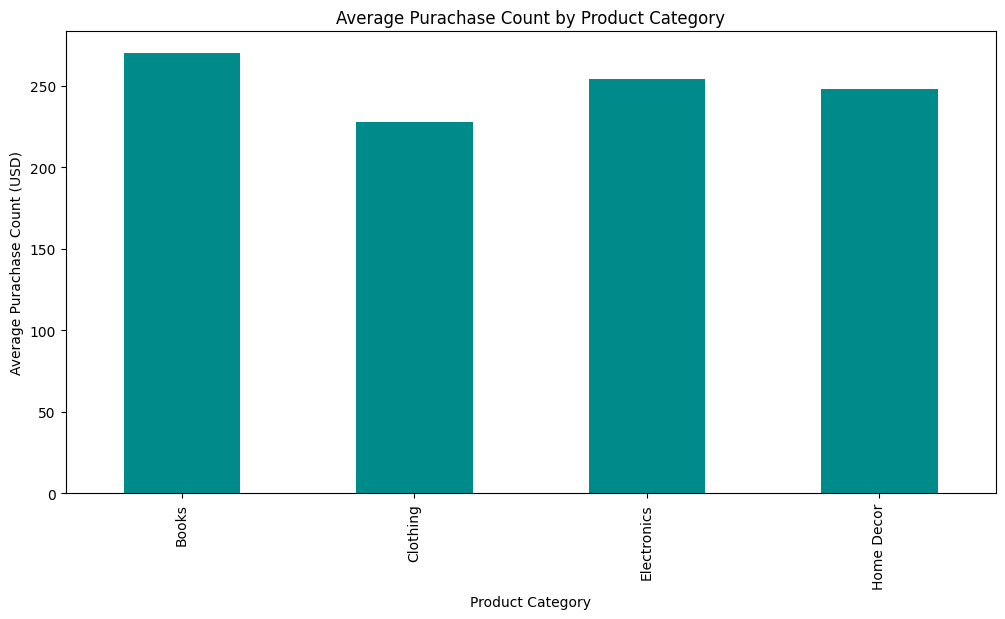

In [38]:
count_by_category = merged_data.groupby('Category')['TotalValue'].count()
print("\nAverage Purchase Count by Product Category:")
print(count_by_category)

count_by_category.plot(kind='bar', color='darkcyan', figsize=(12, 6))
plt.title('Average Purachase Count by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Purachase Count (USD)')
plt.show()

In [ ]:
'''
Q3 is the highest selling quarter of the year for the company with sales almost 20% higher than the other quarters

'''


In [ ]:
'''' 
books make up 31% of the total sales in South America whereas they are only 21% in Asia
'''